# Navie-Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

smoking_dataset = pd.read_csv(filepath_or_buffer="Dataset/Standardized_Smoking.csv")
smoking_dataset.head()

,gender,age,height,weight,waist,sightL,sightR,hearL,hearR,systolicP,...,ldl,hemoglobin,uProtein,sCreatinine,ast,alt,gtp,caries,tartar,smoking
0,-1.319926,-0.344157,-1.050078,-0.457567,-0.079491,0.618616,0.021820,-0.16117,-0.16281,-0.547109,...,0.343301,-1.100271,-0.215324,-0.851209,-0.422099,-0.259350,-0.256956,-0.521015,0.894199,0.0
1,-1.319926,-0.344157,-0.506364,-0.457567,-0.111843,-0.607480,-1.210286,-0.16117,-0.16281,-0.181415,...,0.373183,-1.228038,-0.215324,-1.310208,-0.215740,-0.259350,-0.435846,-0.521015,0.894199,0.0
2,0.757618,0.900109,0.581062,-0.457567,-0.219682,-0.607480,-0.594233,-0.16117,-0.16281,1.208219,...,1.090357,0.752354,-0.215324,0.525789,-0.267330,-0.356156,-0.356339,-0.521015,-1.118320,1.0
3,0.757618,-0.344157,0.037349,0.322412,0.643036,1.538188,1.561952,-0.16117,-0.16281,-1.571050,...,3.331526,0.049634,-0.215324,0.525789,-0.370509,-0.033469,-0.435846,-0.521015,0.894199,0.0
4,-1.319926,-0.344157,-1.050078,-0.457567,0.427356,0.005568,0.021820,-0.16117,-0.16281,-0.108277,...,-0.224461,-1.355805,-0.215324,-1.310208,-0.525278,-0.420694,-0.356339,-0.521015,-1.118320,0.0


In [2]:
X = smoking_dataset.drop(['smoking'], axis = 1).values
y = smoking_dataset['smoking'].values

print(X.shape)
print(y.shape)

(55494, 24)
(55494,)


### Balanced dataset vs Unbalanced dataset

#### Unbalanced Dataset

In [3]:
# Train on data. No parameters to adjust
from sklearn.naive_bayes import GaussianNB       ### Because continuous data
from sklearn.model_selection import (
    StratifiedKFold, 
    cross_val_score, 
    train_test_split
)
import sklearn.neighbors as nb

# OBS: deleted 'random_state' parameter since its use is no longer needed
cv = StratifiedKFold(
    n_splits = 10, 
) 

gnb = GaussianNB()
cv_scores = cross_val_score(
    gnb,
    X = X,
    y = y,
    cv = cv
)
np.mean(cv_scores)  # Mean score of the executions

0.70515740682113

In [4]:
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score, confusion_matrix

predicted = cross_val_predict(
    estimator = GaussianNB(), 
    X = X,
    y = y,  
    cv = cv
)  

print(confusion_matrix(y, predicted))  # Confusion matrix
print(accuracy_score(y, predicted))    # Accuracy compute using both, true value and prediction

[[22554 12552]
 [ 3810 16578]]
0.7051573143042491


In [5]:
from sklearn.metrics import classification_report

print(classification_report(y, predicted))

              precision    recall  f1-score   support

         0.0       0.86      0.64      0.73     35106
         1.0       0.57      0.81      0.67     20388

    accuracy                           0.71     55494
   macro avg       0.71      0.73      0.70     55494
weighted avg       0.75      0.71      0.71     55494



***
##### Adjusting probability threshold

In [6]:
(X_train, X_test,  y_train, y_test) = train_test_split(X, y, test_size = .3, random_state = 1)
print(X_train)
print(y_train)

[[-1.31992609 -0.34415718 -0.5063644  ... -0.45572234  1.91933022
   0.89419875]
 [ 0.75761818 -2.00317893  0.03734881 ... -0.55510527 -0.52101509
  -1.11831962]
 [-1.31992609  0.07059826 -0.5063644  ... -0.5153521  -0.52101509
   0.89419875]
 ...
 [ 0.75761818 -2.00317893  0.58106202 ... -0.31658623 -0.52101509
   0.89419875]
 [-1.31992609 -0.34415718 -0.5063644  ... -0.2172033  -0.52101509
   0.89419875]
 [-1.31992609 -0.34415718 -1.05007762 ... -0.47559893 -0.52101509
   0.89419875]]
[0. 0. 0. ... 1. 0. 0.]


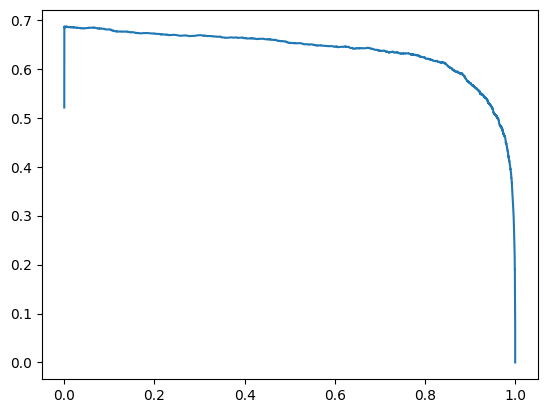

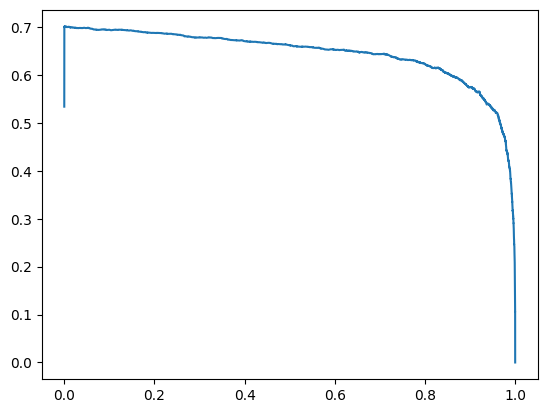

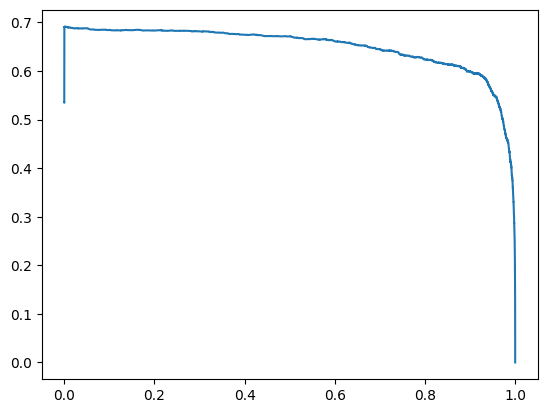

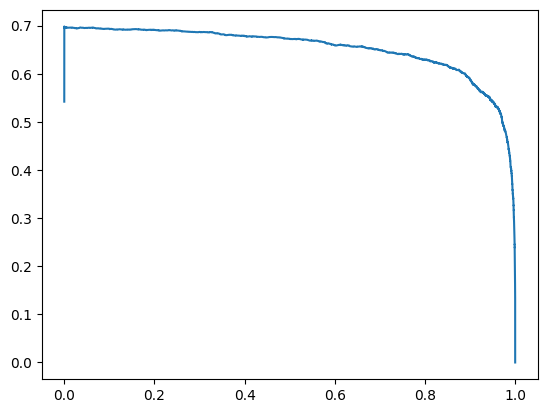

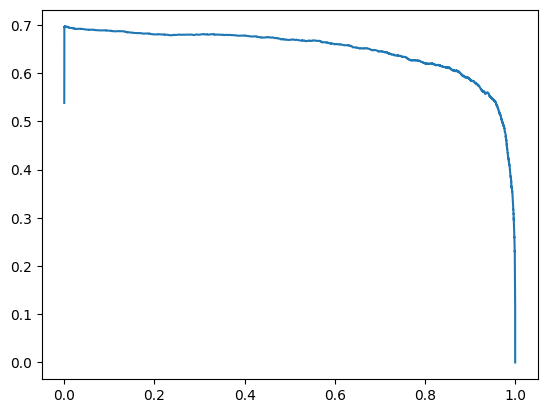

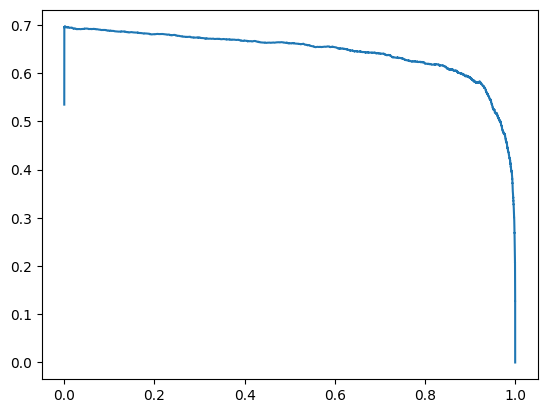

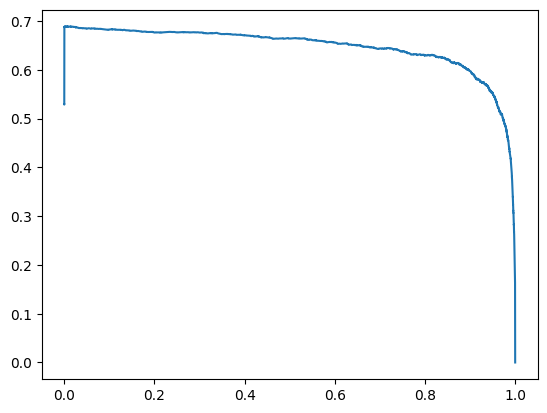

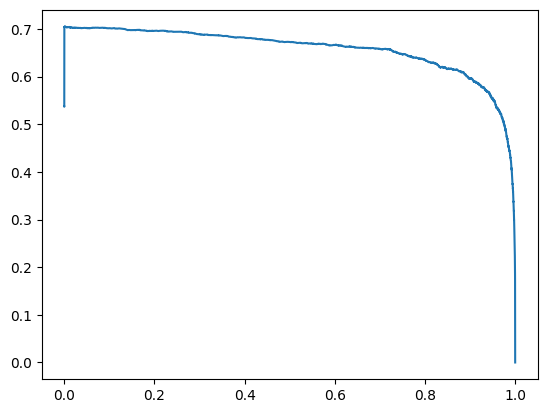

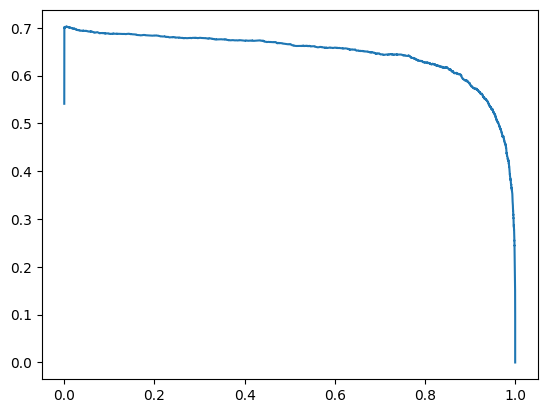

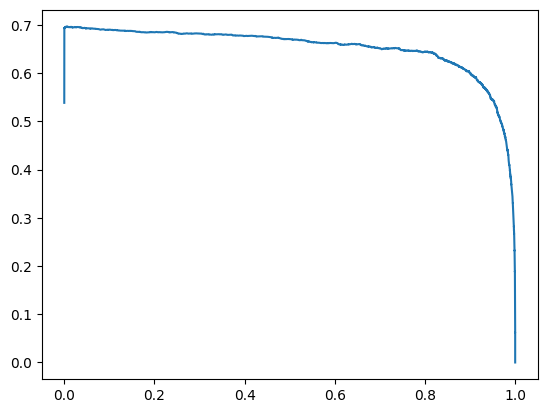

Selected threshold in 10-fold cross validation: 0.002845


In [7]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def filterp(th,ProbClass1):
    """Given a threshold "th" and a set of probabilities of belonging to class 1 "ProbClass1", 
    return predictions.""" 
    y = np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>th:
            y[i]=1
    return y  

clf = GaussianNB()
lth=[]

# We do a 10-fold cross-validation with 10 iterations
kf = StratifiedKFold(
    n_splits = 10, 
    shuffle = True, 
    random_state = 42
)

# Now we compute the threshold by iterating the data we have
for train_index, test_index in kf.split(X_train, y_train):
    
    X_train2, X_test2 = X[train_index], X[test_index]
    y_train2, y_test2 = y[train_index], y[test_index]

    # Train with the training data of the iteration 
    clf.fit(X_train2, y_train2)
    # Obtaining probability predictions for test data of the iteration
    probs = clf.predict_proba(X_test2)
    # Collect probabilities of belonging to class 1
    ProbClass1 = probs[:,1]
    # Sort probabilities and generate pairs (threshold, f1-for-that-threshold) 
    res = np.array([[th,f1_score(y_test2,filterp(th,ProbClass1),pos_label=1)] for th in np.sort(ProbClass1)])
    
    
    # Uncomment the following lines if you want to plot at each iteration how f1-score 
    # evolves increasing the threshold 
    plt.plot(res[:,0],res[:,1])
    plt.show()
    
    
    # Find the threshold that has maximum value of f1-score
    maxF = np.max(res[:,1])
    pl = np.argmax(res[:,1])
    optimal_th = res[pl,0]
    
    # Store the optimal threshold found for the current iteration
    lth.append(optimal_th)

# Compute the average threshold for all 10 iterations    
threshold = np.mean(lth)
print(f"Selected threshold in 10-fold cross validation: {np.round(threshold, 6)}")

In [8]:
# Train a classifier with the whole training data 
clf = GaussianNB()
clf.fit(X_train, y_train)

# Obtain probabilities for data on test set
probs = clf.predict_proba(X_test)

# Generate predictions using probabilities and threshold found on 10 folds cross-validation
prediction = filterp(threshold,probs[:,1])

print(classification_report(y_test, prediction))
# Ignore warnings explaining that in some iterations f1 score is 0

              precision    recall  f1-score   support

         0.0       0.95      0.56      0.70     10585
         1.0       0.55      0.95      0.70      6064

    accuracy                           0.70     16649
   macro avg       0.75      0.75      0.70     16649
weighted avg       0.80      0.70      0.70     16649



In [9]:
clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.86      0.64      0.73     10585
         1.0       0.57      0.81      0.67      6064

    accuracy                           0.70     16649
   macro avg       0.71      0.73      0.70     16649
weighted avg       0.75      0.70      0.71     16649



#### Balanced Dataset

In [10]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy="majority", random_state=1)

In [11]:
# Train on data. No parameters to adjust
from sklearn.naive_bayes import GaussianNB       ### Because continuous data
from sklearn.model_selection import (
    StratifiedKFold, 
    cross_val_score, 
    train_test_split
)
import sklearn.neighbors as nb

from imblearn.pipeline import Pipeline

# OBS: deleted 'random_state' parameter since its use is no longer needed
cv = StratifiedKFold(
    n_splits = 10, 
) 

pipeline = Pipeline(steps=[('undersampler', undersampler), ('model', GaussianNB())])

cv_scores = cross_val_score(
    pipeline,
    X = X,
    y = y,
    cv = cv
)
np.mean(cv_scores)  # Mean score of the executions

0.7047970010017226

In [12]:
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score, confusion_matrix

predicted = cross_val_predict(
    estimator = pipeline, 
    X = X,
    y = y,  
    cv = cv
)  

print(confusion_matrix(y, predicted))  # Confusion matrix
print(accuracy_score(y, predicted))    # Accuracy compute using both, true value and prediction

[[21775 13331]
 [ 3051 17337]]
0.7047969149817999


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y, predicted))

              precision    recall  f1-score   support

         0.0       0.88      0.62      0.73     35106
         1.0       0.57      0.85      0.68     20388

    accuracy                           0.70     55494
   macro avg       0.72      0.74      0.70     55494
weighted avg       0.76      0.70      0.71     55494



***
##### Adjusting probability threshold

In [14]:
(X_train, X_test,  y_train, y_test) = train_test_split(X, y, test_size = .3, random_state = 1)
X_under_train, y_under_train  = undersampler.fit_resample(X_train, y_train)

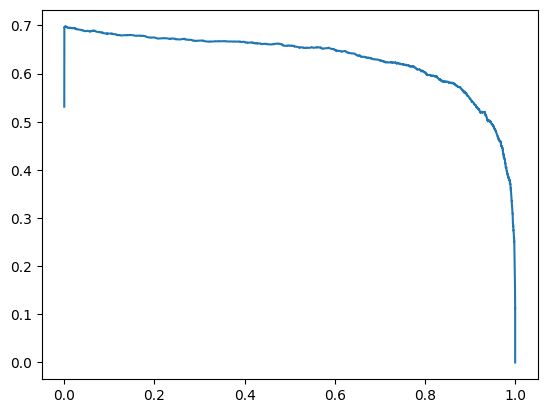

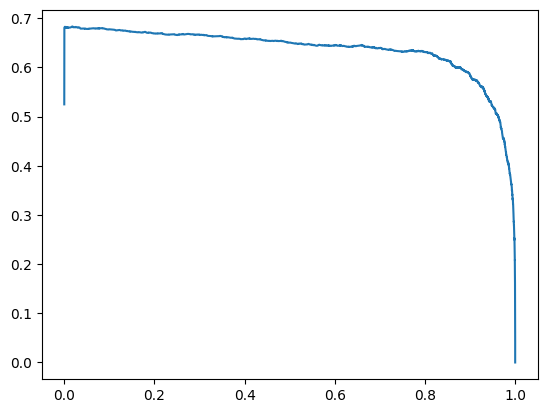

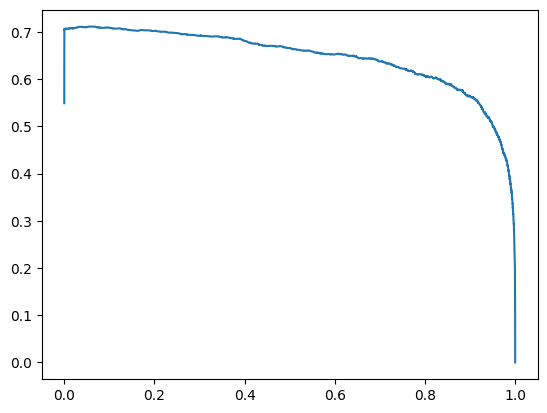

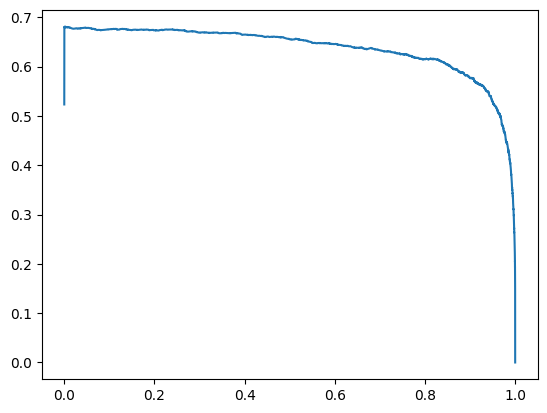

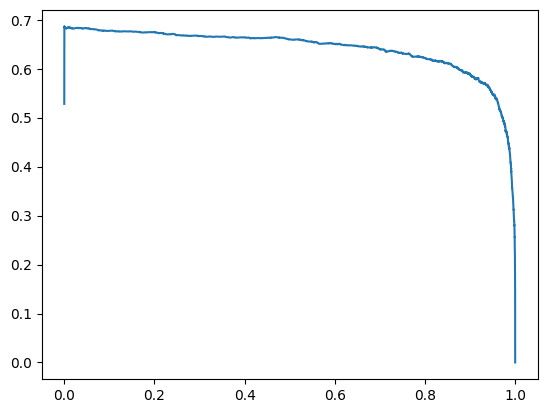

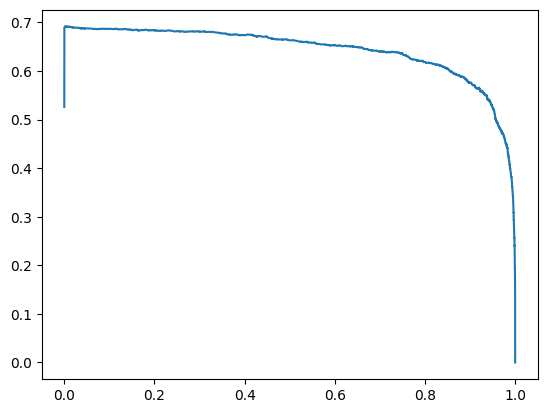

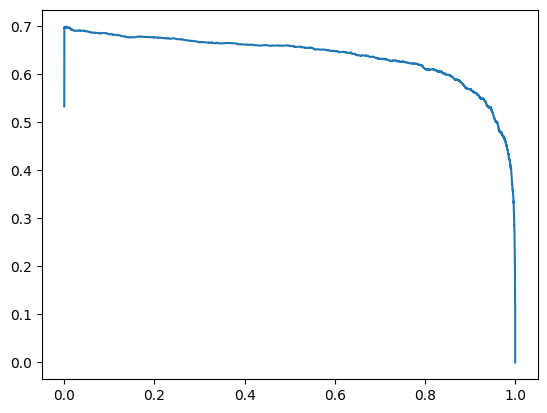

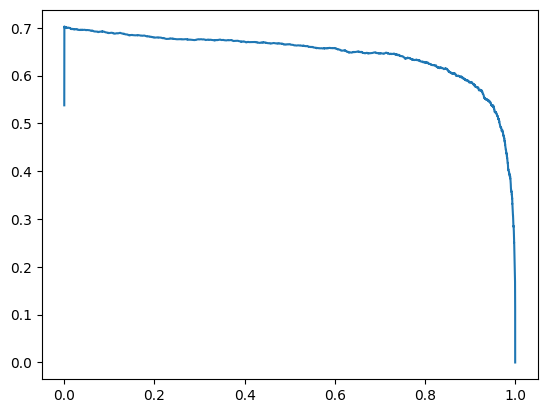

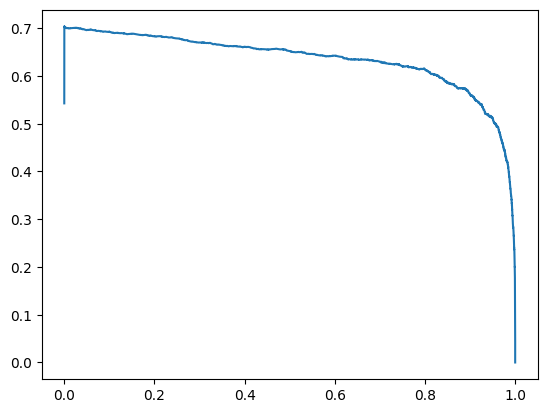

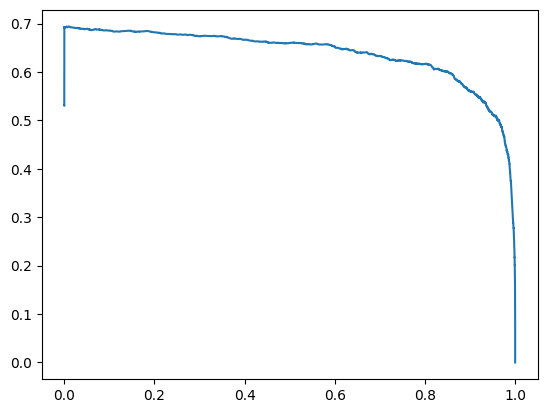

Selected threshold in 10-fold cross validation: 0.009984


In [15]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def filterp(th,ProbClass1):
    """Given a threshold "th" and a set of probabilities of belonging to class 1 "ProbClass1", 
    return predictions.""" 
    y = np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>th:
            y[i]=1
    return y  

clf = GaussianNB()
lth=[]

# We do a 10-fold cross-validation with 10 iterations
kf = StratifiedKFold(
    n_splits = 10, 
    shuffle = True, 
    random_state = 42
)

# Now we compute the threshold by iterating the data we have
for train_index, test_index in kf.split(X_under_train, y_under_train):
    
    X_train2, X_test2 = X[train_index], X[test_index]
    y_train2, y_test2 = y[train_index], y[test_index]

    # Train with the training data of the iteration 
    clf.fit(X_train2, y_train2)
    # Obtaining probability predictions for test data of the iteration
    probs = clf.predict_proba(X_test2)
    # Collect probabilities of belonging to class 1
    ProbClass1 = probs[:,1]
    # Sort probabilities and generate pairs (threshold, f1-for-that-threshold) 
    res = np.array([[th,f1_score(y_test2,filterp(th,ProbClass1),pos_label=1)] for th in np.sort(ProbClass1)])
    
    
    # Uncomment the following lines if you want to plot at each iteration how f1-score 
    # evolves increasing the threshold 
    plt.plot(res[:,0],res[:,1])
    plt.show()
    
    
    # Find the threshold that has maximum value of f1-score
    maxF = np.max(res[:,1])
    pl = np.argmax(res[:,1])
    optimal_th = res[pl,0]
    
    # Store the optimal threshold found for the current iteration
    lth.append(optimal_th)

# Compute the average threshold for all 10 iterations    
threshold = np.mean(lth)
print(f"Selected threshold in 10-fold cross validation: {np.round(threshold, 6)}")

In [16]:
# Train a classifier with the whole training data 
clf = GaussianNB()
clf.fit(X_under_train, y_under_train)

# Obtain probabilities for data on test set
probs = clf.predict_proba(X_test)

# Generate predictions using probabilities and threshold found on 10 folds cross-validation
prediction = filterp(threshold,probs[:,1])

print(classification_report(y_test, prediction))
# Ignore warnings explaining that in some iterations f1 score is 0

              precision    recall  f1-score   support

         0.0       0.95      0.56      0.70     10585
         1.0       0.55      0.94      0.70      6064

    accuracy                           0.70     16649
   macro avg       0.75      0.75      0.70     16649
weighted avg       0.80      0.70      0.70     16649



In [17]:
clf = GaussianNB()
clf.fit(X_under_train, y_under_train)
prediction = clf.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.88      0.62      0.73     10585
         1.0       0.56      0.85      0.68      6064

    accuracy                           0.70     16649
   macro avg       0.72      0.74      0.70     16649
weighted avg       0.76      0.70      0.71     16649

